<a href="https://colab.research.google.com/github/Palash88888/Intelligent-Q-A-System/blob/main/Q%26A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy gradio fuzzywuzzy python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 51.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import gradio as gr
import re
from fuzzywuzzy import process
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Load your datasets
crop_df = pd.read_csv("/content/crop_production.csv")
rain_df = pd.read_csv("/content/rainfall_data.csv")

# Clean column names
crop_df.columns = crop_df.columns.str.strip().str.lower()
rain_df.columns = rain_df.columns.str.strip().str.lower()



print("Data loaded and cleaned successfully.")


Data loaded and cleaned successfully.


In [ ]:
# For crop production dataset
print("Crop Dataset Columns:")
print(crop_df.columns.tolist())

# For rainfall dataset
print("Rainfall Dataset Columns:")
print(rain_df.columns.tolist())

Crop Dataset Columns:
['state_name', 'district_name', 'year', 'season', 'crop', 'area', 'production']
Rainfall Dataset Columns:
['state_name', 'year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'annual', 'jan-feb', 'mar-may', 'jun-sep', 'oct-dec']


In [ ]:
# Check unique states in crop dataset
print("Unique year in Crop Dataset:")
print(crop_df['year'].unique())

# Check unique states in rainfall dataset
print("\nUnique year in Rainfall Dataset:")
print(rain_df['year'].unique())

Unique year in Crop Dataset:
[2000 2001 2002 2003 2004 2005 2006 2010 1997 1998 1999 2007 2008 2009
 2011 2012 2013 2014 2015]

Unique year in Rainfall Dataset:
[1901 1902 1903 1904 1905 1906 1907 1908 1910 1911 1912 1913 1914 1915
 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929
 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1946
 1947 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 1943 1944
 1945 1948 1909]


In [ ]:
print("Unique season in Crop Dataset:")
print(crop_df['season'].unique())

Unique season in Crop Dataset:
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ' 'Kharif   ' 'Rabi    ']


In [ ]:
print("Unique crop in Crop Dataset:")
print(crop_df['crop'].unique())

Unique crop in Crop Dataset:
['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 

In [ ]:
# Rename column in crop dataset
crop_df.rename(columns={'state_name': 'state'}, inplace=True)

# Rename column in rainfall dataset
rain_df.rename(columns={'state_name': 'state'}, inplace=True)

# Check columns after renaming
print("Crop Dataset Columns:", crop_df.columns.tolist())
print("Rainfall Dataset Columns:", rain_df.columns.tolist())


Crop Dataset Columns: ['state', 'district_name', 'year', 'season', 'crop', 'area', 'production']
Rainfall Dataset Columns: ['state', 'year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'annual', 'jan-feb', 'mar-may', 'jun-sep', 'oct-dec']


In [ ]:
# Check unique states in crop dataset
print("Unique States in Crop Dataset:")
print(crop_df['state'].unique())

# Check unique states in rainfall dataset
print("\nUnique States in Rainfall Dataset:")
print(rain_df['state'].unique())

Unique States in Crop Dataset:
['ANDAMAN AND NICOBAR' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'JAMMU AND KASHMIR' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'TELANGANA ' 'TELANGANA' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']

Unique States in Rainfall Dataset:
['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWA

In [ ]:
# Convert crop dataset state names to uppercase
crop_df['state'] = crop_df['state'].str.upper()
print("Unique States in Crop Dataset (Uppercase):")
print(crop_df['state'].unique())

# Convert rainfall dataset state names to uppercase
rain_df['state'] = rain_df['state'].str.upper()
print("Unique States in Rainfall Dataset (Uppercase):")
print(rain_df['state'].unique())

Unique States in Crop Dataset (Uppercase):
['ANDAMAN AND NICOBAR' 'ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM'
 'BIHAR' 'CHANDIGARH' 'CHHATTISGARH' 'DADRA AND NAGAR HAVELI' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUDUCHERRY' 'PUNJAB' 'RAJASTHAN' 'SIKKIM'
 'TAMIL NADU' 'TELANGANA ' 'TELANGANA' 'TRIPURA' 'UTTAR PRADESH'
 'UTTARAKHAND' 'WEST BENGAL']
Unique States in Rainfall Dataset (Uppercase):
['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA

In [ ]:
# Convert to numeric
crop_df['year'] = pd.to_numeric(crop_df['year'], errors='coerce')
crop_df['production'] = pd.to_numeric(crop_df['production'], errors='coerce')
rain_df['year'] = pd.to_numeric(rain_df['year'], errors='coerce')
# Corrected column name from 'annual rainfall (mm)' to 'annual'
rain_df['annual'] = pd.to_numeric(rain_df['annual'], errors='coerce')

# Ensure state names are consistent using 'state_name'
valid_states = rain_df['state'].unique() # Corrected to 'state_name'
def match_state(name):
    # Added str() cast for robustness and using 'state_name'
    match, score = process.extractOne(str(name), valid_states)
    return match if score > 80 else name

# Corrected to use 'state_name'
crop_df['state'] = crop_df['state'].apply(lambda x: match_state(str(x)))
# Corrected to use 'state_name'
rain_df['state'] = rain_df['state'].apply(lambda x: match_state(str(x)))

print(" Data loaded and cleaned successfully") # This print statement seems out of place here, the loading and cleaning is done in other cells

 Data loaded and cleaned successfully


In [ ]:
# Display first 10 rows nicely
crop_df.head(10)

,state,district_name,year,season,crop,area,production
0,ANDAMAN & NICOBAR ISLANDS,NICOBAR ISLANDS,2000,Kharif,Arecanut,1254.0,2000.0
1,ANDAMAN & NICOBAR ISLANDS,NICOBAR ISLANDS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,ANDAMAN & NICOBAR ISLANDS,NICOBAR ISLANDS,2000,Kharif,Rice,102.0,321.0
3,ANDAMAN & NICOBAR ISLANDS,NICOBAR ISLANDS,2000,Whole Year,Banana,176.0,641.0
4,ANDAMAN & NICOBAR ISLANDS,NICOBAR ISLANDS,2000,Whole Year,Cashewnut,720.0,165.0
5,ANDAMAN & NICOBAR ISLANDS,NICOBAR ISLANDS,2000,Whole Year,Coconut,18168.0,65100000.0
6,ANDAMAN & NICOBAR ISLANDS,NICOBAR ISLANDS,2000,Whole Year,Dry ginger,36.0,100.0
7,ANDAMAN & NICOBAR ISLANDS,NICOBAR ISLANDS,2000,Whole Year,Sugarcane,1.0,2.0
8,ANDAMAN & NICOBAR ISLANDS,NICOBAR ISLANDS,2000,Whole Year,Sweet potato,5.0,15.0
9,ANDAMAN & NICOBAR ISLANDS,NICOBAR ISLANDS,2000,Whole Year,Tapioca,40.0,169.0


In [ ]:
rain_df.head(10)

,state,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annual,jan-feb,mar-may,jun-sep,oct-dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [ ]:

# Function to compare crops
def compare_crop(df_crop, crop_name, states, start_year, end_year):
    crop_name = crop_name.lower().strip()
    states = [s.lower().strip() for s in states]

    filtered = df_crop[
        (df_crop['crop'] == crop_name) &
        (df_crop['state'].isin(states)) &
        (df_crop['year'] >= start_year) &
        (df_crop['year'] <= end_year)
    ].sort_values(by=['state', 'year'])

    return filtered

# Example comparisons
rice_comparison = compare_crop(crop_df, 'Rice', ['Maharashtra', 'Tamil Nadu'], 2000, 2015)
print("Rice Production Comparison:")
print(rice_comparison)

wheat_comparison = compare_crop(crop_df, 'Wheat', ['Uttar Pradesh', 'Bihar'], 2000, 2015)
print("\nWheat Production Comparison:")
print(wheat_comparison)


Rice Production Comparison:
Empty DataFrame
Columns: [state, district_name, year, season, crop, area, production]
Index: []

Wheat Production Comparison:
Empty DataFrame
Columns: [state, district_name, year, season, crop, area, production]
Index: []


In [ ]:
# Standardize columns
crop_df['state'] = crop_df['state'].str.upper().str.strip()
crop_df['district_name'] = crop_df['district_name'].str.upper().str.strip()
crop_df['crop'] = crop_df['crop'].str.upper().str.strip()
crop_df['year'] = crop_df['year'].astype(int)  # ensure year is integer

# Filter again using the exact names from the dataset
top5_bihar_wheat = crop_df[
    (crop_df['state'] == 'BIHAR') &
    (crop_df['crop'] == 'WHEAT') &
    (crop_df['year'] == 2014)
].sort_values(by='production', ascending=False).head(5)

print("Top 5 districts in BIHAR for Wheat (2014):")
print(top5_bihar_wheat[['district_name', 'production']]) # Corrected syntax


Top 5 districts in BIHAR for Wheat (2014):
      district_name  production
41384        ROHTAS    300101.0
33716        KAIMUR    188249.0
38245       NALANDA    184641.0
31934          GAYA    178508.0
44765         SIWAN    171367.0


In [ ]:
# Filter for 2015
data_2015 = crop_df[crop_df['year'] == 2015]

# Aggregate production by state, season, and crop
agg_data = data_2015.groupby(['state', 'season', 'crop'])['production'].sum().reset_index()

# Total production per state
total_state_production = agg_data.groupby('state')['production'].sum().sort_values(ascending=False).head(5)
top_states = total_state_production.index.tolist()

# Filter aggregated data for top 5 states
top_states_data = agg_data[agg_data['state'].isin(top_states)].sort_values(['state','production'], ascending=[True,False])

print("Top 5 states by total crop production in 2015 with season and crop breakdown:")
print(top_states_data[['state', 'season', 'crop', 'production']])

Top 5 states by total crop production in 2015 with season and crop breakdown:
                                 state       season                 crop  \
24                              ODISHA  Winter                      RICE   
13                              ODISHA  Summer                      RICE   
26                              ODISHA  Winter                 SUGARCANE   
5                               ODISHA  Autumn                      RICE   
2                               ODISHA  Autumn                     MAIZE   
11                              ODISHA  Summer         MOONG(GREEN GRAM)   
21                              ODISHA  Winter                    POTATO   
8                               ODISHA  Summer                 GROUNDNUT   
22                              ODISHA  Winter                      RAGI   
27                              ODISHA  Winter                      URAD   
20                              ODISHA  Winter         MOONG(GREEN GRAM)   
0         

In [ ]:
# Ensure the dataset columns exist and standardize
rain_df['state'] = rain_df['state'].str.upper().str.strip()
rain_df['year'] = rain_df['year'].astype(int)
# Corrected column name from 'annual rainfall (mm)' to 'annual'
rain_df['annual'] = pd.to_numeric(rain_df['annual'], errors='coerce')  # ensure numeric

# Filter for 2015
rain_2015 = rain_df[rain_df['year'] == 2015]

# Find the state with highest rainfall
max_rain = rain_2015.loc[rain_2015['annual'].idxmax()]

print("State with highest rainfall in 2015:")
print(f"State: {max_rain['state']}, Rainfall: {max_rain['annual']} mm")

State with highest rainfall in 2015:
State: COASTAL KARNATAKA, Rainfall: 3106.0 mm


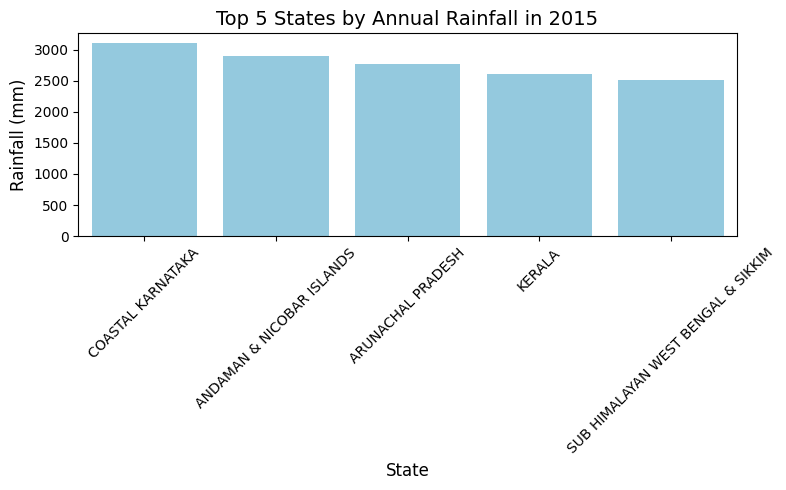

In [ ]:
# Sort by rainfall descending and pick top 5
top_rain_states = rain_2015.sort_values(by='annual', ascending=False).head(5)

# Plot bar graph (Seaborn 0.14+ compatible)
plt.figure(figsize=(8,5))
sns.barplot(data=top_rain_states, x='state', y='annual', color='skyblue')
plt.title('Top 5 States by Annual Rainfall in 2015', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

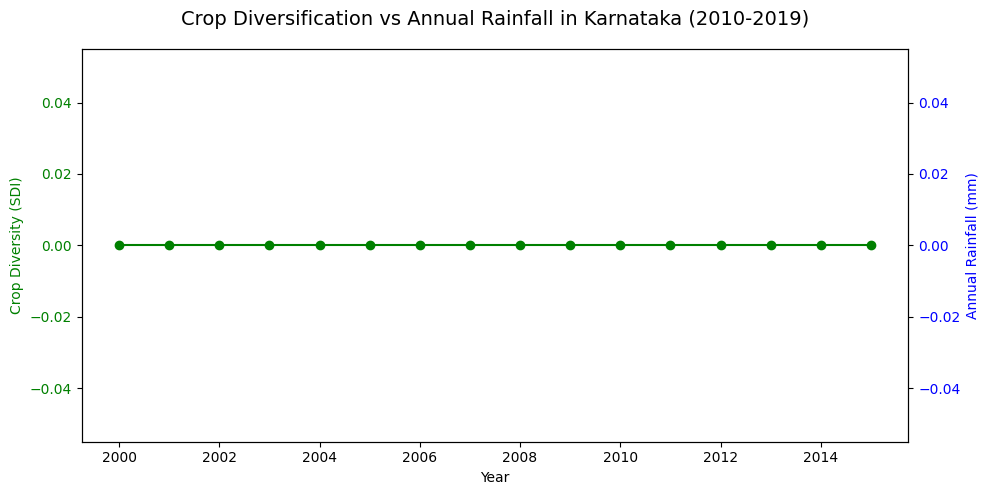

In [ ]:
# Filter Karnataka data
start_year = 2000
end_year = 2015
karnataka_crop = crop_df[(crop_df['state'] == 'KARNATAKA') &
                         (crop_df['year'] >= start_year) & (crop_df['year'] <= end_year)]

# Calculate Shannon Diversity Index per year
diversity_data = []

for year in range(start_year, end_year+1):
    yearly_data = karnataka_crop[karnataka_crop['year'] == year]
    total_prod = yearly_data['production'].sum()
    if total_prod == 0:
        sdi = 0
    else:
        # Proportion of each crop
        p = yearly_data.groupby('crop')['production'].sum() / total_prod
        # Shannon Diversity Index
        sdi = -np.sum(p * np.log(p))
    diversity_data.append({'year': year, 'SDI': sdi})

diversity_df = pd.DataFrame(diversity_data)

# Merge with rainfall data
karnataka_rain = rain_df[(rain_df['state'] == 'KARNATAKA') &
                         (rain_df['year'] >= start_year) & (rain_df['year'] <= end_year)]

merged_df = pd.merge(diversity_df, karnataka_rain[['year', 'annual']], on='year', how='left')

# Plot
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(merged_df['year'], merged_df['SDI'], color='green', marker='o', label='Crop Diversity (SDI)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Crop Diversity (SDI)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.plot(merged_df['year'], merged_df['annual'], color='blue', marker='s', label='Annual Rainfall (mm)')
ax2.set_ylabel('Annual Rainfall (mm)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.suptitle('Crop Diversification vs Annual Rainfall in Karnataka (2010-2019)', fontsize=14)
fig.tight_layout()
plt.show()

In [ ]:
# Ensure state names are consistent by explicitly mapping Karnataka variations
karnataka_variations = ['COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA', 'SOUTH INTERIOR KARNATAKA']
rain_df['state'] = rain_df['state'].apply(lambda x: 'KARNATAKA' if x.strip().upper() in karnataka_variations else x)


# Filter Karnataka data
karnataka_rain = rain_df[rain_df['state'].str.upper().str.strip() == 'KARNATAKA']

# Find the year with maximum rainfall
max_rain_row = karnataka_rain.loc[karnataka_rain['annual'].idxmax()]

print(f"Year with highest rainfall in Karnataka: {max_rain_row['year']}")
print(f"Rainfall: {max_rain_row['annual']} mm")

Year with highest rainfall in Karnataka: 1961
Rainfall: 5553.9 mm


In [ ]:
# Filter Andaman and Nicobar data
a_n_rain = rain_df[rain_df['state'].str.upper().str.strip() == 'ANDAMAN & NICOBAR ISLANDS']

# Find the year with minimum rainfall
min_rain_row = a_n_rain.loc[a_n_rain['annual'].idxmin()]

print(f"Year with lowest rainfall in Andaman and Nicobar: {min_rain_row['year']}")
print(f"Rainfall: {min_rain_row['annual']} mm")

Year with lowest rainfall in Andaman and Nicobar: 1979
Rainfall: 1849.4 mm


In [ ]:
import gradio as gr
import re

# Function to answer questions with source citation
def answer_question_with_source(question):
    q = question.lower()

    #  Crop production comparison
    if "compare" in q and "production" in q:
        # Extract crop names
        crops = [c.strip().upper() for c in re.findall(r'([A-Za-z]+)\s*production', q)]
        # Extract states
        state_match = re.findall(r'between\s([A-Za-z\s]+)\s*and\s([A-Za-z\s]+)', q)
        states = [s.strip().upper() for s in state_match[0]] if state_match else []
        # Extract years
        start_year = int(re.findall(r'from\s(\d+)', q)[0]) if re.findall(r'from\s(\d+)', q) else crop_df['year'].min()
        end_year = int(re.findall(r'to\s(\d+)', q)[0]) if re.findall(r'to\s(\d+)', q) else crop_df['year'].max()

        if crops and states:
            filtered = crop_df[
                (crop_df['crop'] == crops[0]) &
                (crop_df['state'].isin(states)) &
                (crop_df['year'] >= start_year) &
                (crop_df['year'] <= end_year)
            ]
            if filtered.empty:
                return "No data found for this query."
            return f"Source: crop_production.csv\n" + filtered[['state', 'year', 'crop', 'production']].to_string(index=False)

    #  Top production by state/year
    if "highest" in q or "top" in q:
        year_match = re.findall(r'\d{4}', q)
        year = int(year_match[0]) if year_match else crop_df['year'].max()
        top_state = crop_df[crop_df['year']==year].groupby('state')['production'].sum().idxmax()
        top_value = crop_df[crop_df['year']==year].groupby('state')['production'].sum().max()
        return f"Top state by production in {year} is {top_state} with {top_value} units.\nSource: crop_production.csv"

    #  Crop Diversity in Karnataka
    if "diversity" in q and "karnataka" in q:
        year_match = re.findall(r'\d{4}', q)
        if year_match:
            year = int(year_match[0])
            sdi_row = diversity_df[diversity_df['year']==year]
            if not sdi_row.empty:
                return f"Shannon Diversity Index in Karnataka for {year} is {sdi_row['SDI'].values[0]:.4f}\nSource: crop_production.csv"
        return "Please specify a valid year for Karnataka crop diversity."

    #  Rainfall questions
    if "rainfall" in q:
        if "highest" in q and "karnataka" in q:
            row = karnataka_rain.loc[karnataka_rain['annual'].idxmax()]
            return f"Highest rainfall in Karnataka was in {row['year']} with {row['annual']} mm.\nSource: rainfall_data.csv"
        if "lowest" in q and "andaman" in q:
            row = a_n_rain.loc[a_n_rain['annual'].idxmin()]
            return f"Lowest rainfall in Andaman & Nicobar was in {row['year']} with {row['annual']} mm.\nSource: rainfall_data.csv"

    return "Sorry, I cannot answer this question."

# Gradio Interface
iface = gr.Interface(
    fn=answer_question_with_source,
    inputs=gr.Textbox(lines=2, placeholder="Ask a question about crop/rainfall..."),
    outputs="text",
    title="Intelligent Crop & Rainfall Q&A System",
    description="Ask questions and receive answers with source citations."
)

iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c67d8bf76f7c6ae36f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
